# 00. MVP: 

The target of this notebook is to build a minimum viable product to test the idea and see if it works

## 1. WEB SCRAPPING

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

from time import sleep
from random import randint

In [2]:
# The website from where we are going to obtain the data
main_url = "https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=1&cy=E&atype=C&recommended_sorting_based_id=63264e9a-86be-4fce-8e45-42cfcd1def1a&"

In [3]:
#Defining columns for small cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [4]:
# Analysing urls for the diffenret pages:
# url_pag1 = "https://www.autoscout24.es/lst/?sort=standard&desc=0&ustate=N%2CU&size=20&page=1&cy=E&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&"
# url_pag2 = "https://www.autoscout24.es/lst/?sort=standard&desc=0&ustate=N%2CU&size=20&page=2&cy=E&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&"
# url_pag3 = "https://www.autoscout24.es/lst/?sort=standard&desc=0&ustate=N%2CU&size=20&page=3&cy=E&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&"

# Max page per url = 20 (start: page 1, stop: page 21 -1, step: 1 by 1 as the url changes from page=n to page=n+1 from one page to the following

all_pages = np.arange(1,21,1)

In [5]:
#Scapping small cars

for small_cars_page in all_pages:
    
    small_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(small_cars_page) + "&cy=E&body=1&atype=C&recommended_sorting_based_id=63264e9a-86be-4fce-8e45-42cfcd1def1a&")
    small_cars_soup = BeautifulSoup(small_cars_page.text,"lxml")
    small_cars_ads = small_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in small_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [6]:
#Creating the Small_Cars_DataFrame
small_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Small",
                        "Doors" : "5"})

In [7]:
small_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Rover 25,1.6 Classic,\n01/2001\n,\n171.720 km\n,\n80 kW (109 CV)\n,\nGasolina\n,\nManual\n,\n6 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,28045 MADRID,"\n€ 1.290,-\n",Small,5
1,Chevrolet Matiz,0.8 City,\n03/2005\n,\n111.919 km\n,\n38 kW (52 CV)\n,\nGasolina\n,\nManual\n,"\n6,3 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,18195 CULLAR VEGA,"\n€ 1.480,-\nIVA deducible\n",Small,5
2,smart forFour,1.3 Passion Aut.,\n07/2006\n,\n140.000 km\n,\n70 kW (95 CV)\n,\nGasolina\n,\nAutomático\n,\n5 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,46010 VALENCIA,"\n€ 1.490,-\n",Small,5
3,SEAT Toledo,2.0 GTI,\n06/1994\n,\n114.000 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n9 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,28939 MADRID,"\n€ 1.499,-\n",Small,5
4,Daewoo Lanos,1.6 16v. SX,\n06/2000\n,\n185.000 km\n,\n78 kW (106 CV)\n,\nGasolina\n,\nManual\n,"\n8,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46940 MANISES,"\n€ 1.500,-\n",Small,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Opel Astra,1.2T S/S Elegance 145,\n10/2019\n,\n15.694 km\n,\n107 kW (145 CV)\n,\nGasolina\n,\nManual\n,"\n4,3 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,26006 LOGROÑO,"\n€ 18.400,-\n",Small,5
396,Audi A3,Sedán 1.0 TFSI S Line Edition S-T 85kW,\n03/2019\n,\n57.000 km\n,\n85 kW (116 CV)\n,\nGasolina\n,\nAutomático\n,"\n4,6 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28046 MADRID,"\n€ 18.450,-\n",Small,5
397,Skoda Scala,1.6 TDI Ambition DSG 85kW,\n11/2020\n,\n27.500 km\n,\n85 kW (116 CV)\n,\nDiésel\n,\nAutomático\n,"\n4,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,36214 VIGO,"\n€ 18.490,-\nIVA deducible\n",Small,5
398,Honda Civic,Sedán 1.5 VTEC Turbo Elegance Navi,\n03/2018\n,\n47.370 km\n,\n134 kW (182 CV)\n,\nGasolina\n,\nManual\n,"\n5,5 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28045 MADRID,"\n€ 18.500,-\n",Small,5


In [8]:
#Defining columns for sedan cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [9]:
#Scapping sedan cars

for sedan_cars_page in all_pages:
    
    sedan_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(sedan_cars_page) + "&cy=E&body=6&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    sedan_cars_soup = BeautifulSoup(sedan_cars_page.text,"lxml")
    sedan_cars_ads = sedan_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in sedan_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [10]:
#Creating the Sedan_Cars_DataFrame
sedan_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Sedan",
                        "Doors" : "5"})

In [11]:
sedan_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Peugeot 607,2.2HDi Aut.,\n01/2002\n,\n220.000 km\n,\n100 kW (136 CV)\n,\nDiésel\n,\nAutomático\n,"\n7,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,08227 TERRASSA,"\n€ 800,-\n",Sedan,5
1,Lancia Dedra,1.8 i.e. LE,\n06/1994\n,\n84.000 km\n,\n78 kW (106 CV)\n,\nGasolina\n,\nManual\n,\n0 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,26500 CALAHORRA,"\n€ 1.499,-\n",Sedan,5
2,Audi A4,1.9TDI A.A.,\n09/1995\n,\n329.370 km\n,\n66 kW (90 CV)\n,\nDiésel\n,\nManual\n,"\n6,3 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,33199 GRANDA - SIERO,"\n€ 1.500,-\n",Sedan,5
3,Mercedes-Benz C 320,Avantgarde 4M,\n01/2004\n,\n480.000 km\n,\n160 kW (218 CV)\n,\nGasolina\n,\nAutomático\n,"\n10,7 l/100 km (mixto)\nPuede obtenerse infor...",\n- (g/km)\n,\n- (Propietarios)\n,37300 PEÑARANDA DE BRACAMONTE,"\n€ 1.599,-\n",Sedan,5
4,Renault Laguna,2.0 RXE,\n02/1995\n,\n72.810 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n10 l/100 km (mixto)\nPuede obtenerse informa...,\n- (g/km)\n,\n- (Propietarios)\n,28015 MADRID,"\n€ 1.850,-\n",Sedan,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Volvo S90,T5 Inscription Aut. 254,\n11/2016\n,\n114.504 km\n,\n187 kW (254 CV)\n,\nGasolina\n,\nAutomático\n,"\n6,5 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28021 MADRID,"\n€ 25.590,-\n",Sedan,5
396,Volkswagen Passat,1.5 TSI 110KW EXECUTIVE 150 4P,\n07/2020\n,\n19.750 km\n,\n110 kW (150 CV)\n,\nGasolina\n,\nManual\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,30314 CARTAGENA,"\n€ 25.800,-\n",Sedan,5
397,Honda e,ADVANCE 113KW 17 ALW 154 CV 5P,\n07/2020\n,\n16.267 km\n,\n113 kW (154 CV)\n,\nEléctrico\n,\nAutomático\n,\n- (l/100 km)\n,\n0 g/km (mixto)\nPuede obtenerse información ...,\n- (Propietarios)\n,08226 TERRASSA,"\n€ 25.900,-\n",Sedan,5
398,BMW 318,318dA Business,\n09/2017\n,\n33.879 km\n,\n110 kW (150 CV)\n,\nDiésel\n,\nAutomático\n,\n4 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,46015 VALENCIA,"\n€ 25.900,-\n",Sedan,5


In [12]:
#Defining columns for familiar cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [13]:
#Scapping familiar cars

for familiar_cars_page in all_pages:
    
    familiar_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(familiar_cars_page) + "&cy=E&body=5&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    familiar_cars_soup = BeautifulSoup(familiar_cars_page.text,"lxml")
    familiar_cars_ads = familiar_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in familiar_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [14]:
#Creating the Familiar_Cars_DataFrame
familiar_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Wagon",
                        "Doors" : "5"})

In [15]:
familiar_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Peugeot 307,SW 1.6HDI Clim Plus,\n12/2004\n,\n210.000 km\n,\n80 kW (109 CV)\n,\nDiésel\n,\nManual\n,"\n4,9 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,48940 LEIOA,"\n€ 1.200,-\n",Wagon,5
1,Peugeot 307,SW Pack + 1.6 HDI 90CV --- EMBRAGUE AVERIADO--,\n11/2006\n,\n201.000 km\n,\n66 kW (90 CV)\n,\nDiésel\n,\nManual\n,"\n5,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,08020 BARCELONA,"\n€ 1.590,-\n",Wagon,5
2,Volvo 850,Estate 2.0 10v,\n06/1995\n,\n128.000 km\n,\n93 kW (126 CV)\n,\nGasolina\n,\nManual\n,\n0 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,03580 ALFAZ DEL PI,"\n€ 2.490,-\n",Wagon,5
3,Opel Astra,SW 1.7CDTi Enjoy 6vel.,\n03/2007\n,\n197.300 km\n,\n73 kW (99 CV)\n,\nDiésel\n,\nManual\n,\n5 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,48960 GALDAKAO,"\n€ 2.490,-\n",Wagon,5
4,Audi A4,Avant 2.5TDI Multitronic,\n07/2004\n,\n333.865 km\n,\n120 kW (163 CV)\n,\nDiésel\n,\nAutomático\n,"\n6,9 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,48960 GALDAKANO,"\n€ 2.900,-\n",Wagon,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,SEAT Leon,ST 2.0TDI CR S&S FR DSG 150,\n03/2017\n,\n112.000 km\n,\n110 kW (150 CV)\n,\nDiésel\n,\nAutomático\n,"\n4,5 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28946 FUENLABRADA,"\n€ 15.990,-\n",Wagon,5
396,BMW Active Hybrid 7,Tourer 218d,\n07/2016\n,\n84.350 km\n,\n100 kW (136 CV)\n,\nDiésel\n,\nManual\n,"\n4,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,15864 SANTIAGO DE COMPOSTELA,"\n€ 16.000,-\n",Wagon,5
397,Volkswagen Golf,Variant 1.0 TSI Advance 85kW,\n06/2019\n,\n72.000 km\n,\n85 kW (116 CV)\n,\nGasolina\n,\nManual\n,"\n4,8 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,29631 BENALMÁDEMA,"\n€ 16.200,-\nIVA deducible\n",Wagon,5
398,Volkswagen Passat,Variant 2.0TDI Advance 110kW,\n04/2016\n,\n69.700 km\n,\n110 kW (150 CV)\n,\nDiésel\n,\nManual\n,"\n4,3 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28939 ARROYOMOLINOS,"\n€ 16.400,-\n",Wagon,5


In [16]:
#Defining columns for minivan cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [17]:
#Scapping minivans cars

for minivan_cars_page in all_pages:
    
    minivan_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(minivan_cars_page) + "&cy=E&body=12&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    minivan_cars_soup = BeautifulSoup(minivan_cars_page.text,"lxml")
    minivan_cars_ads = minivan_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in minivan_cars_ads:
        
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [18]:
#Creating the Minivan_Cars_DataFrame
minivan_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Minivan",
                        "Doors" : "5"})

In [19]:
minivan_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Opel Zafira,2.2Dti 16v Elegance,\n05/2002\n,\n158.000 km\n,\n92 kW (125 CV)\n,\nDiésel\n,\nManual\n,"\n6,9 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,08020 BARCELONA,"\n€ 2.390,-\n",Minivan,5
1,Opel Zafira,1.9CDTi Cosmo 120,\n07/2007\n,\n330.307 km\n,\n88 kW (120 CV)\n,\nDiésel\n,\nManual\n,"\n6,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,06200 ALMENDRALEJO,"\n€ 2.900,-\n",Minivan,5
2,Ford Galaxy,2.0TDci Ghia,\n08/2006\n,\n241.549 km\n,\n103 kW (140 CV)\n,\nDiésel\n,\nManual\n,"\n6,5 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46930 QUART DE POBLET,"\n€ 3.300,-\n",Minivan,5
3,Dacia Lodgy,1.5dCi Laureate 5pl. 66kW,\n05/2014\n,\n425.000 km\n,\n66 kW (90 CV)\n,\nDiésel\n,\nManual\n,"\n4,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,29004 MALAGA,"\n€ 3.800,-\nIVA deducible\n",Minivan,5
4,SEAT Altea XL,I-Tech Ecomotive,\n09/2014\n,\n283.115 km\n,\n76 kW (103 CV)\n,\nDiésel\n,\nManual\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,08280 CALAF,"\n€ 3.900,-\n",Minivan,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Renault Megane,1.6 Alizé 90,\n01/1999\n,\n190.000 km\n,\n65 kW (88 CV)\n,\nGasolina\n,\nManual\n,"\n8,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46940 MANISES,"\n€ 1.650,-\n",Minivan,5
396,Renault Megane,1.6 Alizé 90,\n01/1999\n,\n190.000 km\n,\n65 kW (88 CV)\n,\nGasolina\n,\nManual\n,"\n8,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46940 MANISES,"\n€ 1.650,-\n",Minivan,5
397,Ford Fusion,1.4TDCI Elegance,\n06/2003\n,\n270.000 km\n,\n50 kW (68 CV)\n,\nDiésel\n,\nManual\n,"\n4,7 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,,"\n€ 1.700,-\n",Minivan,5
398,Renault Espace,RT 2000,\n09/1997\n,\n143.000 km\n,\n115 kW (156 CV)\n,\nGasolina\n,\nManual\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,,"\n€ 1.700,-\n",Minivan,5


In [20]:
#Defining columns for coupe cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [21]:
#Scapping coupe cars

for coupe_cars_page in all_pages:
    
    coupe_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(coupe_cars_page) + "&cy=E&body=3&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    coupe_cars_soup = BeautifulSoup(coupe_cars_page.text,"lxml")
    coupe_cars_ads = coupe_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in coupe_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [22]:
#Creating the Coupe_Cars_DataFrame
coupe_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Coupe",
                        "Doors" : "3"})

In [23]:
coupe_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Mercedes-Benz C 200,Sportcoupé K,\n09/2003\n,\n267.000 km\n,\n120 kW (163 CV)\n,\nGasolina\n,\nAutomático\n,"\n9,7 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,8304 MATARO,"\n€ 2.950,-\n",Coupe,3
1,Mercedes-Benz C 200,Sportcoupé K,\n01/2002\n,\n203.000 km\n,\n120 kW (163 CV)\n,\nGasolina\n,\nManual\n,"\n9,7 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,29004 MALAGA,"\n€ 2.950,-\n",Coupe,3
2,Peugeot 406,Coupé 2.2 Chess,\n01/2004\n,\n139.000 km\n,\n118 kW (160 CV)\n,\nGasolina\n,\nManual\n,\n8 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,46980 PATERNA,"\n€ 3.400,-\n",Coupe,3
3,Toyota Celica,2.0 GT,\n01/1991\n,\n225.000 km\n,\n117 kW (159 CV)\n,\nGasolina\n,\nManual\n,\n0 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,17251 CALONGE,"\n€ 3.500,-\n",Coupe,3
4,MG MGF,F VVC,\n02/1997\n,\n126.543 km\n,\n107 kW (145 CV)\n,\nGasolina\n,\nManual\n,"\n7,9 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,48970 BASAURI,"\n€ 4.990,-\n",Coupe,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Volvo C70,2.3 / T5,\n01/2000\n,\n88.100 km\n,\n176 kW (239 CV)\n,\nGasolina\n,\nManual\n,\n10 l/100 km (mixto)\nPuede obtenerse informa...,\n- (g/km)\n,\n- (Propietarios)\n,29620 TORREMOLINOS,"\n€ 7.900,-\n",Coupe,3
396,Volkswagen Scirocco,1.4 TSI 160,\n11/2009\n,\n210.000 km\n,\n118 kW (160 CV)\n,\nGasolina\n,\nManual\n,"\n6,6 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,43204 REUS,"\n€ 8.995,-\n",Coupe,3
397,BMW Z3,2.0i Roadster,\n07/2000\n,\n85.294 km\n,\n110 kW (150 CV)\n,\nGasolina\n,\nManual\n,\n8 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,8960 Sant Just Desvern,"\n€ 9.500,-\n",Coupe,3
398,Chrysler Crossfire,3.2 V6 Limited,\n05/2011\n,\n185.000 km\n,\n160 kW (218 CV)\n,\nGasolina\n,\nManual\n,"\n10,4 l/100 km (mixto)\nPuede obtenerse infor...",\n- (g/km)\n,\n- (Propietarios)\n,28891 VELILLA DE SAN ANTONIO,"\n€ 9.900,-\n",Coupe,3


In [24]:
#Defining columns for cabrio cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [25]:
#Scapping cabrio cars

for cabrio_cars_page in all_pages:
    
    cabrio_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(cabrio_cars_page) + "&cy=E&body=2&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    cabrio_cars_soup = BeautifulSoup(cabrio_cars_page.text,"lxml")
    cabrio_cars_ads = cabrio_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in cabrio_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [26]:
#Creating the Cabrio_Cars_DataFrame
cabrio_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Convertible",
                        "Doors" : "3"})

In [27]:
cabrio_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Mitsubishi Colt,CZC 1.5 16v Instyle,\n06/2006\n,\n83.000 km\n,\n80 kW (109 CV)\n,\nGasolina\n,\nManual\n,"\n6,6 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46930 QUART DE POBLET,"\n€ 2.200,-\n",Convertible,3
1,Peugeot 206,CC 2.0,\n07/2001\n,\n174.000 km\n,\n101 kW (137 CV)\n,\nGasolina\n,\nManual\n,\n8 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,8030 BARCELONA,"\n€ 2.999,-\n",Convertible,3
2,Opel Tigra,TwinTop 1.4 16V Sport,\n04/2006\n,\n167.188 km\n,\n66 kW (90 CV)\n,\nGasolina\n,\nManual\n,"\n6,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,50013 ZARAGOZA,"\n€ 2.999,-\n",Convertible,3
3,Peugeot 307,CC 2.0 Pack Hifi,\n11/2006\n,\n260.000 km\n,\n104 kW (141 CV)\n,\nGasolina\n,\nManual\n,"\n8,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,37189 ALDEASECA DE ARMUÑA,"\n€ 3.500,-\n",Convertible,3
4,Chrysler Stratus,Cabrio 2.5 LX,\n06/1997\n,\n204.349 km\n,\n120 kW (163 CV)\n,\nGasolina\n,\nAutomático\n,\n10 l/100 km (mixto)\nPuede obtenerse informa...,\n- (g/km)\n,\n- (Propietarios)\n,46470 MASSANASSA,"\n€ 3.600,-\n",Convertible,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Renault Megane,C.C. 1.6 Confort Dynamique 115,\n10/2004\n,\n99.711 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n7 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,12006 CASTELLON,"\n€ 4.900,-\n",Convertible,3
396,Renault Megane,C.C. 1.6 Confort Dynamique 115,\n10/2004\n,\n99.711 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n7 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,18320 SANTA FE,"\n€ 4.900,-\n",Convertible,3
397,Renault Megane,C.C. 1.6 Confort Dynamique 115,\n10/2004\n,\n99.711 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n7 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,29620 Torremolinos,"\n€ 4.900,-\n",Convertible,3
398,Renault Megane,C.C. 1.6 Confort Dynamique 115,\n10/2004\n,\n99.711 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n7 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,08227 TERRASSA,"\n€ 4.900,-\n",Convertible,3


In [28]:
#Defining columns for suv cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [29]:
#Scapping suv cars

for suv_cars_page in all_pages:
    
    suv_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(suv_cars_page) + "&cy=E&body=4&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    suv_cars_soup = BeautifulSoup(suv_cars_page.text,"lxml")
    suv_cars_ads = suv_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in suv_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [30]:
#Creating the Suv_Cars_DataFrame
suv_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Suv",
                        "Doors" : "5"})

In [31]:
suv_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Land Rover Freelander,2.0 DI,\n03/1999\n,\n185.525 km\n,\n71 kW (97 CV)\n,\nDiésel\n,\nManual\n,"\n9,6 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,03580 ALFAZ DEL PI,"\n€ 2.490,-\n",Suv,5
1,Suzuki Vitara,1.6 Techo Metálico,\n06/1991\n,\n169.000 km\n,\n59 kW (80 CV)\n,\nGasolina\n,\nManual\n,\n0 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,17500 RIPOLL,"\n€ 2.650,-\n",Suv,5
2,Nissan Terrano,2.7 TD Comfort,\n09/2001\n,\n202.000 km\n,\n73 kW (99 CV)\n,\nDiésel\n,\nManual\n,"\n10,3 l/100 km (mixto)\nPuede obtenerse infor...",\n- (g/km)\n,\n- (Propietarios)\n,38110 Santa Cruz de Tenerife,"\n€ 2.995,-\n",Suv,5
3,Suzuki Grand Vitara,1.6 L JA,\n07/2006\n,\n300.447 km\n,\n78 kW (106 CV)\n,\nGasolina\n,\nManual\n,"\n8,7 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46930 QUART DE POBLET,"\n€ 3.450,-\n",Suv,5
4,SsangYong REXTON,270 Full GRAN OCASION NACIONAL,\n12/2004\n,\n299.000 km\n,\n121 kW (165 CV)\n,\nDiésel\n,\nAutomático\n,"\n8,6 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,23700 LINARES,"\n€ 3.499,-\n",Suv,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Volkswagen Tiguan,2.0TDI Advance DSG 110kW,\n03/2017\n,\n100.344 km\n,\n110 kW (150 CV)\n,\nDiésel\n,\nAutomático\n,"\n4,8 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28021 MADRID,"\n€ 19.590,-\n",Suv,5
396,Peugeot 5008,Allure BlueHDi 96kW (130CV) S&S EAT8,\n07/2018\n,\n119.760 km\n,\n96 kW (131 CV)\n,\nDiésel\n,\nAutomático\n,"\n4,1 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28021 MADRID,"\n€ 19.690,-\n",Suv,5
397,Opel Mokka,1.2T S&S GS Line Plus 130 AT8,\n04/2021\n,\n27.723 km\n,\n96 kW (131 CV)\n,\nGasolina\n,\nAutomático\n,\n0 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,37900 Santa Marta de Tormes,"\n€ 19.700,-\n",Suv,5
398,Mercedes-Benz ML 320,320CDI Aut.,\n04/2008\n,\n85.451 km\n,\n165 kW (224 CV)\n,\nDiésel\n,\nAutomático\n,"\n9,4 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28045 MADRID,"\n€ 19.700,-\n",Suv,5


In [32]:
#Defining columns for Van cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [33]:
#Scapping Van cars

for van_cars_page in all_pages:
    
    van_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(van_cars_page) + "&cy=E&body=13&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    van_cars_soup = BeautifulSoup(van_cars_page.text,"lxml")
    van_cars_ads = van_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in van_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [34]:
#Creating the Van_Cars_DataFrame
van_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Van",
                        "Doors" : "3"})

In [35]:
van_cars_df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Citroen,Berlingo Combi 2.0HDi Leader,,,\n66 kW (90 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,46940 MANISES,"\n€ 1.950,-\n",Van,3
1,Fiat,Fiorino 1.3MJET FURGON,,,\n55 kW (75 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,08921 BADALONA,"\n€ 2.980,-\n",Van,3
2,Ford,Fiesta Van 1.5TDCi,,,\n55 kW (75 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,27300 Guitiriz,"\n€ 4.120,-\nIVA deducible\n",Van,3
3,Citroen,Berlingo First Combi 1.6HDI X,,,\n55 kW (75 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,08720 VILAFRANCA DEL PENEDÉS,"\n€ 4.380,-\nIVA deducible\n",Van,3
4,Renault,1.5Dci COMERCIAL,,,\n55 kW (75 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,08921 BADALONA,"\n€ 4.580,-\n",Van,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Peugeot,Partner 1.6HDI 75 Totem,,,\n55 kW (75 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,06100 OLIVENZA,"\n€ 4.490,-\n",Van,3
396,Citroen,Nemo Furgón 1.2HDI,,,\n55 kW (75 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,28803 ALCALÁ DE HENARES,"\n€ 4.490,-\n",Van,3
397,Renault,Kangoo Combi 1.5dCi Authentique 85,,,\n63 kW (86 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,13440 ARGAMASILLA DE CALATRAVA,"\n€ 4.490,-\n",Van,3
398,Ford,FORD Connect Comercial Industrial Manual de 5 Pue,,,\n66 kW (90 CV)\n,\nDiésel\n,\nManual\n,,\n- (g/km)\n,,41710 UTRERA,"\n€ 4.490,-\n",Van,3


In [36]:
#Defining columns for Other cars
title = []
version = []
year = []
kms = []
hp = []
gear = []
fuel = []
fuel_cons = []
co2 =[]
prev_owners = []
price = []
location = []

In [37]:
#Scapping Other cars

for other_cars_page in all_pages:
    
    other_cars_page = requests.get("https://www.autoscout24.es/lst/?sort=standard&desc=0&offer=D%2CJ%2CO%2CU&ustate=N%2CU&size=20&page=" + str(other_cars_page) + "&cy=E&body=7&atype=C&recommended_sorting_based_id=add4f573-8a91-417b-8217-546c0129def6&")
    other_cars_soup = BeautifulSoup(other_cars_page.text,"lxml")
    other_cars_ads = other_cars_soup.find_all('div', attrs={"class": "cl-list-element cl-list-element-gap"})
    
    sleep(randint(2,10))
    
    for element in other_cars_ads:
        try:
            Title = element.find('h2', attrs={"class":'cldt-summary-makemodel sc-font-bold sc-ellipsis'}).text
        except:
            Title = ""
        title.append(Title)
        
        try:
            Version = element.find('h2', attrs={"class":"cldt-summary-version sc-ellipsis"}).text
        except:
            Version = ""
        version.append(Version)
        try:
            Year = element.find('li', attrs={'data-type':'first-registration'}).text
        except:
            Year = ""
        year.append(Year)
        try:
            Kms = element.find('li', attrs={"data-type" : "mileage"}).text
        except:
            Kms = ""
        kms.append(Kms)

        try:
            Gear = element.find('li', attrs={"data-type":"transmission-type"}).text
        except:
            Gear = ""
        gear.append(Gear)

        try:
            Fuel = element.find('li', attrs={"class":"summary_item_no_bottom_line"}).text
        except:
            Fuel = ""
        fuel.append(Fuel)

        try:
            Fuel_cons = element.find('li', attrs={"data-type":"combined-consumption"}).text
        except:
            Fuel_cons = ""
        fuel_cons.append(Fuel_cons)

        try:
            Co2 = element.find('li', attrs={"data-type":"co2-emission"}).text
        except:
            Co2 = ""
        co2.append(Co2)

        try:
            Prev_owners = element.find('li', attrs={"data-type" : "previous-owners"}).text
        except:
            Prev_owners = ""
        prev_owners.append(Prev_owners)
        try:
            Price = element.find('span', attrs={"class":"cldt-price sc-font-xl sc-font-bold"}).text
        except:
            Price = ""
        price.append(Price)

        try:
            Hp = element.find('li', text =re.compile(r'CV')).text
        except:
            Hp = ""
        hp.append(Hp)
        
        try:
            Location = element.find('span', attrs={"class":"cldf-summary-seller-contact-zip-city"}).text
        except:
            Location = ""
        location.append(Location)

In [38]:
#Creating the Other_Cars_DataFrame
other_cars_df = pd.DataFrame({"Title":title,
                        "Version":version,
                        "Year": year,
                        "Kms": kms,
                        "Hp": hp,
                        "Fuel_type": fuel,
                        "Gear_type": gear,
                        "Fuel_cons": fuel_cons,
                        "CO2_g/Km": co2,
                        "Previous_owners": prev_owners,
                        "City_ZIP" : location,
                        "Price_EUR": price,
                        "Category" : "Other",
                        "Doors" : "5"})

In [39]:
#Mergin all DataFrames 
all_cars_df = pd.concat([small_cars_df,
                         sedan_cars_df,
                         familiar_cars_df,
                         minivan_cars_df,
                         coupe_cars_df,
                         cabrio_cars_df,
                         suv_cars_df,
                         van_cars_df,
                         other_cars_df], axis = 0)
#Reset_index
all_cars_df = all_cars_df.reset_index()

In [40]:
all_cars_df.drop(["index"],axis = 1)

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,Rover 25,1.6 Classic,\n01/2001\n,\n171.720 km\n,\n80 kW (109 CV)\n,\nGasolina\n,\nManual\n,\n6 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,28045 MADRID,"\n€ 1.290,-\n",Small,5
1,Chevrolet Matiz,0.8 City,\n03/2005\n,\n111.919 km\n,\n38 kW (52 CV)\n,\nGasolina\n,\nManual\n,"\n6,3 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,18195 CULLAR VEGA,"\n€ 1.480,-\nIVA deducible\n",Small,5
2,smart forFour,1.3 Passion Aut.,\n07/2006\n,\n140.000 km\n,\n70 kW (95 CV)\n,\nGasolina\n,\nAutomático\n,\n5 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,46010 VALENCIA,"\n€ 1.490,-\n",Small,5
3,SEAT Toledo,2.0 GTI,\n06/1994\n,\n114.000 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n9 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,28939 MADRID,"\n€ 1.499,-\n",Small,5
4,Daewoo Lanos,1.6 16v. SX,\n06/2000\n,\n185.000 km\n,\n78 kW (106 CV)\n,\nGasolina\n,\nManual\n,"\n8,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46940 MANISES,"\n€ 1.500,-\n",Small,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,MG MGB,,\n02/1974\n,\n50.000 km\n,\n- kW (- CV)\n,\nGasolina\n,\nManual\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,8860 CASTELLDEFELS,"\n€ 16.500,-\n",Other,5
3596,Chevrolet G,,\n03/1935\n,\n650.000 km\n,\n59 kW (80 CV)\n,\nGasolina\n,\n- (Cambio)\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,,"\n€ 16.500,-\n",Other,5
3597,Volvo C70,T5 summum,\n02/2011\n,\n71.000 km\n,\n240 kW (326 CV)\n,\nGasolina\n,\n- (Cambio)\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,,"\n€ 16.500,-\n",Other,5
3598,SEAT Leon,Cupra R,\n10/2011\n,\n88.000 km\n,\n195 kW (265 CV)\n,\nGasolina\n,\n- (Cambio)\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,,"\n€ 16.500,-\n",Other,5


In [107]:
all_cars_df.to_csv('/users/alfon/Desktop/Master/TFM/Csv/00.cars_raw_mvp.csv', header=True, index=False)

## 2. DATA CLEANING

A) Formatting

In [42]:
cars_raw = ("/users/alfon/Desktop/Master/TFM/CSV/00.cars_raw_mvp.csv")

In [43]:
df = pd.read_csv(cars_raw)
df.head()

,index,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
0,0,Rover 25,1.6 Classic,\n01/2001\n,\n171.720 km\n,\n80 kW (109 CV)\n,\nGasolina\n,\nManual\n,\n6 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,28045 MADRID,"\n€ 1.290,-\n",Small,5
1,1,Chevrolet Matiz,0.8 City,\n03/2005\n,\n111.919 km\n,\n38 kW (52 CV)\n,\nGasolina\n,\nManual\n,"\n6,3 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,18195 CULLAR VEGA,"\n€ 1.480,-\nIVA deducible\n",Small,5
2,2,smart forFour,1.3 Passion Aut.,\n07/2006\n,\n140.000 km\n,\n70 kW (95 CV)\n,\nGasolina\n,\nAutomático\n,\n5 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,46010 VALENCIA,"\n€ 1.490,-\n",Small,5
3,3,SEAT Toledo,2.0 GTI,\n06/1994\n,\n114.000 km\n,\n84 kW (114 CV)\n,\nGasolina\n,\nManual\n,\n9 l/100 km (mixto)\nPuede obtenerse informac...,\n- (g/km)\n,\n- (Propietarios)\n,28939 MADRID,"\n€ 1.499,-\n",Small,5
4,4,Daewoo Lanos,1.6 16v. SX,\n06/2000\n,\n185.000 km\n,\n78 kW (106 CV)\n,\nGasolina\n,\nManual\n,"\n8,2 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,46940 MANISES,"\n€ 1.500,-\n",Small,5


In [44]:
df.drop(['index'], axis=1, inplace = True)

In [45]:
#Columns overview

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            3590 non-null   object
 1   Version          3382 non-null   object
 2   Year             3281 non-null   object
 3   Kms              3281 non-null   object
 4   Hp               3590 non-null   object
 5   Fuel_type        3590 non-null   object
 6   Gear_type        3590 non-null   object
 7   Fuel_cons        3281 non-null   object
 8   CO2_g/Km         3590 non-null   object
 9   Previous_owners  3281 non-null   object
 10  City_ZIP         3077 non-null   object
 11  Price_EUR        3590 non-null   object
 12  Category         3600 non-null   object
 13  Doors            3600 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 393.9+ KB


In [47]:
#Removing NaN rows
df = df.dropna(subset=["Title","Year","Kms","Hp","Fuel_type","Gear_type","City_ZIP","Price_EUR"])

In [48]:
#Year -> only YYYY
df["Year"] = df["Year"].apply(str).str.strip()\
            .apply(str).str[3:]

In [49]:
df.Year.value_counts()

2017    430
2018    404
2019    315
2016    239
2020    202
       ... 
1958      1
1947      1
1985      1
1960      1
1921      1
Name: Year, Length: 62, dtype: int64

In [50]:
#Kms -> removing \n

df["Kms"] = df["Kms"].apply(str).str.strip()\
            .apply(str).str.strip("km")\
            .apply(str).str.replace(".","")

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_11036/2632899347.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Kms"] = df["Kms"].apply(str).str.strip()\


In [51]:
#Hp

df["Hp"] = df["Hp"].apply(str).str.strip()\
            .apply(str).str.split(pat = "(").str[1]\
            .apply(str).str[:-3]
            

df.Hp.value_counts()

150       258
116       152
120       125
90        115
190       106
         ... 
605         1
1.201       1
169         1
91          1
514         1
Name: Hp, Length: 225, dtype: int64

In [52]:
#Fuel_type

df["Fuel_type"] = df["Fuel_type"].apply(str).str.strip()

df.Fuel_type.value_counts()

Diésel               1400
Gasolina             1189
Electro/Gasolina       77
Eléctrico              65
Otros                  24
Gas natural (CNG)      13
- (Combustible)         5
Name: Fuel_type, dtype: int64

In [53]:
df[df.Fuel_type == "- (Combustible)" ]

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
36,Microcar,Microcar MGO,2010,33737,8,- (Combustible),\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,28600 NAVALCARNERO,"\n€ 4.999,-\n",Small,5
111,Ligier JS 50,Ligier JS 50,2018,29840,11,- (Combustible),\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,46910 BENETUSER,"\n€ 8.998,-\nIVA deducible\n",Small,5
112,Microcar Due,Microcar DUE,2019,14100,11,- (Combustible),\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,46910 BENETUSER,"\n€ 8.998,-\n",Small,5
209,Ligier JS 50,Ligier JS 50,2019,1,8,- (Combustible),\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,46910 BENETUSER,"\n€ 11.998,-\n",Small,5
3200,Renault R 5,Diesel de Puertas,1979,0,-,- (Combustible),\nManual\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,43206 REUS,"\n€ 2.900,-\n",Other,5


The cars above are cars with an engine with no more than 50cc and do not requiere the standard driving licence . All these cars use Diesel propulsion systems .

<<img>>

In [54]:
df["Fuel_type"] = df["Fuel_type"].str.replace("- \(Combustible\)","Diésel")

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_11036/2076222903.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Fuel_type"] = df["Fuel_type"].str.replace("- \(Combustible\)","Diésel")


In [55]:
df[df.Fuel_type == "Otros" ]

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,CO2_g/Km,Previous_owners,City_ZIP,Price_EUR,Category,Doors
245,Kia Niro,DRIVE,2017,127800,141,Otros,\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,36860 PONTEAEREAS,"\n€ 13.500,-\n",Small,5
254,Toyota Auris,1.8 140H HYBRID ACTIVE,2018,70000,136,Otros,\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,29004 MALAGA,"\n€ 13.800,-\nIVA deducible\n",Small,5
262,Kia Niro,DRIVE,2017,109000,141,Otros,\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,36860 PONTEAEREAS,"\n€ 13.990,-\n",Small,5
332,Kia Niro,1.6 GDI HIBRIDO DRIVE,2018,74790,141,Otros,\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,36860 PONTEAEREAS,"\n€ 15.500,-\n",Small,5
358,Kia Niro,1.6 GDI HIBRIDO DRIVE,2018,59369,141,Otros,\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,36860 PONTEAEREAS,"\n€ 16.500,-\n",Small,5
461,Lexus GS 450h,President híbrido,2009,236408,345,Otros,\nAutomático\n,"\n7,9 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28770 COLMENAR VIEJO,"\n€ 7.990,-\n",Sedan,5
517,Fiat 500,1.0 HYBRID CULT 70 3P,2021,5516,71,Otros,\nManual\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,20180 OIARTZUN,"\n€ 12.300,-\n",Sedan,5
533,Kia Niro,DRIVE,2017,148000,141,Otros,\nAutomático\n,\n- (l/100 km)\n,\n- (g/km)\n,\n- (Propietarios)\n,36860 PONTEAEREAS,"\n€ 12.990,-\n",Sedan,5
556,Ford Mondeo,2.0 Híbrido 137kW (187CV) Titanium HEV,2018,150002,186,Otros,\nAutomático\n,"\n4,8 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,08281 Calonge de Segarra,"\n€ 14.444,-\n",Sedan,5
573,Lexus CT 200h,Executive con Navibox 181€/mes,2014,115400,136,Otros,\nAutomático\n,"\n3,8 l/100 km (mixto)\nPuede obtenerse inform...",\n- (g/km)\n,\n- (Propietarios)\n,28050 MADRID,"\n€ 15.495,-\n",Sedan,5


Basically, almost all the cars identified with the fuel type "Otros" belongs to the category Hybrid as detailed on the column named "Version". For the few left we will include them in Others.

In [56]:
df.Fuel_type[(df["Fuel_type"] == "Otros") & (df["Version"].str.contains("Hybrid|Híbrido|Hibrido|Hev|Rex|Eco|h|HYBRID|HEV|HÍBRIDO|HIBRIDO|REX|ECO|E-|H"))] = "Hybrid"




/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_11036/317323725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fuel_type[(df["Fuel_type"] == "Otros") & (df["Version"].str.contains("Hybrid|Híbrido|Hibrido|Hev|Rex|Eco|h|HYBRID|HEV|HÍBRIDO|HIBRIDO|REX|ECO|E-|H"))] = "Hybrid"


In [57]:
df["Fuel_type"] = df["Fuel_type"].str.replace("Electro/Gasolina", "Hybrid")\
                .str.replace("Electro/Diésel", "Hybrid") \
                .str.replace("Gasolina", "Petrol")\
                .str.replace("Diésel", "Diesel")\
                .str.replace("Eléctrico", "Electric")\
                .str.replace("Gas natural \(CNG\)", "Compressed Natural Gas \(CNG\)")\
                .str.replace("Gas licuado \(GLP\)", "Liquefied Petroleum Gas \(LPG\)")\
                .str.replace("Otros", "Others")
                

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_11036/2176675699.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Fuel_type"] = df["Fuel_type"].str.replace("Electro/Gasolina", "Hybrid")\


In [58]:

df = df.drop(df[df['Fuel_type'] == "Others"].index)
df.Fuel_type.value_counts()

Diesel                            1405
Petrol                            1189
Hybrid                              89
Electric                            65
Compressed Natural Gas \(CNG\)      13
Name: Fuel_type, dtype: int64

In [59]:
#Gear_type
df.Gear_type.value_counts()

\nManual\n        1500
\nAutomático\n    1261
Name: Gear_type, dtype: int64

In [60]:
df["Gear_type"] = df["Gear_type"].apply(str).str.strip()\
                                 .str.replace("Semiautomático","Automatic")\
                                 .str.replace("Automático","Automatic")
                                 

df = df.drop(df[df['Gear_type'] == "- (Cambio)"].index)



In [61]:
df.Gear_type.value_counts()

Manual       1500
Automatic    1261
Name: Gear_type, dtype: int64

In [62]:
#Fuel_cons
df["Fuel_cons"] = df["Fuel_cons"].apply(str).str.strip()\
                                       .apply(str).str.split(pat="/").str[0]\
                                       .apply(str).str.split().str[0]
                                       



In [63]:
#CO2
df["CO2_g/Km"] = df["CO2_g/Km"].apply(str).str.strip()\
                               .apply(str).str.split().str[0]

df["CO2_g/Km"].value_counts()

-    2696
0      65
Name: CO2_g/Km, dtype: int64

In [64]:
df.drop(['CO2_g/Km'], axis=1, inplace = True)

In [65]:
#Prev_owners
df["Previous_owners"] = df["Previous_owners"].apply(str).str.strip()\
                                             .apply(str).str.split(pat="(").str[1]\
                                             .apply(str).str.split(pat=")").str[0]
                                             

In [66]:
df["Previous_owners"].value_counts()

Propietarios    2761
Name: Previous_owners, dtype: int64

In [67]:
df.drop(['Previous_owners'], axis=1, inplace = True)

In [68]:
#Price
df["Price_EUR"] = df["Price_EUR"].apply(str).str.strip()\
                                 .map(lambda x: x.lstrip('€').rstrip(',- \nIVA deducible'))\
                                 .apply(str).str.replace(".","")

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_11036/4294222183.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price_EUR"] = df["Price_EUR"].apply(str).str.strip()\


B) New Columns

In [69]:
#Spliting the title into Brand and Model

#There are some Brands that are built with two words so before splitting the title into Brand and Model we will identify these Brands mentioned and transformate them.
long_brands = ["Land-Rover","Alfa-Romeo","Aston-Martin"]
df["Title"] = df["Title"].str.replace("Land Rover", long_brands[0])\
.str.replace("Alfa Romeo", long_brands[1])\
.str.replace("Aston Martin", long_brands[2])

In [70]:
df[["Brand","Model"]] = df["Title"].str.split(' ', 1, expand = True)

In [71]:
df.sample(10)

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,City_ZIP,Price_EUR,Category,Doors,Brand,Model
1894,Mercedes-Benz GLE 350,Coupé 350d 4Matic Aut.,2019,68610,258,Diesel,Automatic,"7,8",28022 madrid,65900,Coupe,3,Mercedes-Benz,GLE 350
51,Fiat 500,1.2 Sport,2008,102356,69,Petrol,Manual,"5,1",02007 ALBACETE,6499,Small,5,Fiat,500
46,Toyota Aygo,1.0 VVT-i City,2013,56453,68,Petrol,Manual,"4,3",46600 ALZIRA,5990,Small,5,Toyota,Aygo
517,Fiat 500,1.0 HYBRID CULT 70 3P,2021,5516,71,Hybrid,Manual,-,20180 OIARTZUN,12300,Sedan,5,Fiat,500
1172,Volkswagen Passat,Variant 1.6TDI Edition 88kW,2018,91000,120,Diesel,Manual,"4,1",28946 FUENLABRADA,15000,Wagon,5,Volkswagen,Passat
201,SEAT Leon,1.6TDI CR S&S Reference 115,2017,78332,116,Diesel,Manual,"4,2",28806 ALCALA DE HENARES,11900,Small,5,SEAT,Leon
217,Toyota Yaris,1.0 Active,2017,41317,69,Petrol,Manual,"5,1",41007 SEVILLA,12490,Small,5,Toyota,Yaris
1751,Porsche 996,Carrera 4S 320cv Único,2002,178500,320,Petrol,Automatic,11,28015 MADRID,32800,Coupe,3,Porsche,996
2770,Peugeot 3008,1.5BlueHDi Allure S&S 130,2018,104990,131,Diesel,Manual,"4,3",28703 SAN SEBASTIAN DE LOS REYES,18990,Suv,5,Peugeot,3008
605,Opel Insignia,1.5 T XFT S&S Innovation 165,2019,26242,166,Petrol,Manual,6,3205 ELCHE,16800,Sedan,5,Opel,Insignia


In [72]:
df.groupby(by='Brand').size()

Brand
Abarth             5
Alfa-Romeo        15
Alpine             1
Aston-Martin       4
Audi             212
BMW              320
Bentley            7
Buick              1
Cadillac           1
Chevrolet          6
Chrysler           9
Citroen           80
Cupra              2
DS                 6
Dacia             21
Daewoo             2
Daihatsu           1
Delorean           1
Dodge              3
Ferrari           28
Fiat              65
Ford             153
Honda             24
Hyundai           41
Infiniti          14
Jaguar            29
Jeep              11
Kia               41
Lamborghini        1
Lancia             5
Land-Rover        29
Lexus             28
Ligier             2
MG                 8
MINI              31
Mahindra           1
Maserati          10
Mazda             24
McLaren            2
Mercedes-Benz    334
Microcar           2
Mitsubishi        13
Nissan            62
Opel             133
Peugeot          142
Porsche           64
Renault          171
Rolls-R

In [73]:
df.Model.value_counts()

A4            59
Megane        58
Leon          49
Passat        36
Golf          34
              ..
Ulysse         1
Almera         1
Space Star     1
Agila          1
Midget         1
Name: Model, Length: 578, dtype: int64

In [74]:
#Splitting City and ZIP Code

df[["ZIP","City"]] = df["City_ZIP"].str.split(' ',1, expand = True)

In [75]:
#Defining the CCAA ******

zip_codes_html = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Provincias_de_Espa%C3%B1a_por_c%C3%B3digo_postal')
zip_codes = zip_codes_html[0]
zip_codes["zip_first_digits"] = zip_codes["Código postal"].apply('{:0>2}'.format)
zip_codes

,Código postal,Provincia,Código Ministerio del Interior,zip_first_digits
0,1,Álava,VI,01
1,2,Albacete,AB,02
2,3,Alicante,A,03
3,4,Almería,AL,04
4,5,Ávila,AV,05
5,6,Badajoz,BA,06
6,7,Baleares,PM / IB,07
7,8,Barcelona,B,08
8,9,Burgos,BU,09
9,10,Cáceres,CC,10


In [76]:
df["ZIP"] = df["ZIP"].apply('{:0>5}'.format)
df.sample(5)

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,City_ZIP,Price_EUR,Category,Doors,Brand,Model,ZIP,City
1492,Renault Espace,1.6dCi TT Energy Zen EDC 118kW,2017,112578,160,Diesel,Automatic,"4,7",28522 Rivas VaciaMadrid,20900,Minivan,5,Renault,Espace,28522,Rivas VaciaMadrid
3527,smart forFour,electric drive / EQ passion,2018,30789,56,Electric,Manual,-,28022 MADRID,13995,Other,5,smart,forFour,28022,MADRID
314,Citroen C4 Cactus,1.2 PureTech S&S Shine 110,2019,6806,110,Petrol,Manual,"4,5",36860 PONTEAEREAS,14990,Small,5,Citroen,C4 Cactus,36860,PONTEAEREAS
1955,Porsche 991,Turbo Coupé PDK,2017,61000,540,Petrol,Automatic,"9,1",46600 ALZIRA,131500,Coupe,3,Porsche,991,46600,ALZIRA
731,Peugeot 508,1.2 PureTech S&S Active Pack EAT8 130,2021,27951,131,Petrol,Automatic,"4,8",28021 MADRID,23000,Sedan,5,Peugeot,508,28021,MADRID


In [77]:
df["zip_first_digits"] = df["ZIP"].str.slice( stop = 2 )
df.sample(5)

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,City_ZIP,Price_EUR,Category,Doors,Brand,Model,ZIP,City,zip_first_digits
2717,Nissan X-Trail,1.6 DIG-T N-Connecta 4x2,2018,63000,163,Petrol,Manual,"6,4",28850 TORREJON DE ARDOZ,17990,Suv,5,Nissan,X-Trail,28850,TORREJON DE ARDOZ,28
1000,SEAT Leon,NUEVO SPORTSTOURER 1.5 ETSI 110 KW (150 CV) DS...,2020,5937,150,Petrol,Manual,-,30100 ESPINARDO,24500,Wagon,5,SEAT,Leon,30100,ESPINARDO,30
2406,Audi Allroad,2.5 TDI quattro Tiptronic,2003,389000,179,Diesel,Automatic,"9,6",28891 VELILLA DE SAN ANTONIO,3900,Suv,5,Audi,Allroad,28891,VELILLA DE SAN ANTONIO,28
607,BMW 520,520dA,2016,143403,190,Diesel,Automatic,"4,3",48960 GALDAKANO,16830,Sedan,5,BMW,520,48960,GALDAKANO,48
976,Opel Insignia,CT 2.0 CDTi Biturbo 4x4 Country To. Auto,2018,17229,209,Diesel,Automatic,"7,2",28021 MADRID,22690,Wagon,5,Opel,Insignia,28021,MADRID,28


In [78]:
df = df.merge(zip_codes[["zip_first_digits","Provincia"]], on = "zip_first_digits",how = "outer").rename(columns={'Provincia':'Province'})
df.drop(['City', "zip_first_digits","City_ZIP"], axis=1, inplace = True)

In [79]:
df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,Price_EUR,Category,Doors,Brand,Model,ZIP,Province
0,Rover 25,1.6 Classic,2001,171720,109,Petrol,Manual,6,1290,Small,5.0,Rover,25,28045,Madrid
1,SEAT Toledo,2.0 GTI,1994,114000,114,Petrol,Manual,9,1499,Small,5.0,SEAT,Toledo,28939,Madrid
2,Fiat Grande Punto,1.9Mjt Sport 130,2005,240000,129,Diesel,Manual,"5,8",2500,Small,5.0,Fiat,Grande Punto,28891,Madrid
3,Skoda Octavia,1.9TDI Trend 105,2007,255520,105,Diesel,Manual,5,2990,Small,5.0,Skoda,Octavia,28232,Madrid
4,Opel Astra,1.7CDTI Enjoy,2011,200718,110,Diesel,Manual,"4,7",4000,Small,5.0,Opel,Astra,28224,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,Nissan Terrano,2.7 TD Comfort,2001,202000,99,Diesel,Manual,"10,3",2995,Suv,5.0,Nissan,Terrano,38110,Santa Cruz de Tenerife
2761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orense
2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Soria
2763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teruel


In [80]:
df["Province"].value_counts()



Madrid                    868
Barcelona                 345
Valencia                  214
Alicante                  137
Málaga                    135
Murcia                    126
Pontevedra                124
Vizcaya                   113
Sevilla                    72
Córdoba                    52
Zaragoza                   43
Asturias                   33
Burgos                     33
Guipúzcoa                  32
Valladolid                 29
Granada                    27
Cantabria                  24
Tarragona                  24
Gerona/Girona              23
Ciudad Real                21
Badajoz                    21
Albacete                   20
Cádiz                      19
Castellón                  18
Jaén                       18
La Coruña                  17
Baleares                   16
Álava                      16
Navarra                    15
Cáceres                    14
Salamanca                  12
La Rioja                   11
Toledo                     11
Huesca    

In [81]:
df = df.dropna(subset=["Title","Year","Kms","Hp","Fuel_type","Gear_type","Price_EUR","Doors"])

In [82]:
df = df.loc[df["Hp"] != "- "]
df = df.loc[df["Fuel_cons"] != "-"]
df

,Title,Version,Year,Kms,Hp,Fuel_type,Gear_type,Fuel_cons,Price_EUR,Category,Doors,Brand,Model,ZIP,Province
0,Rover 25,1.6 Classic,2001,171720,109,Petrol,Manual,6,1290,Small,5.0,Rover,25,28045,Madrid
1,SEAT Toledo,2.0 GTI,1994,114000,114,Petrol,Manual,9,1499,Small,5.0,SEAT,Toledo,28939,Madrid
2,Fiat Grande Punto,1.9Mjt Sport 130,2005,240000,129,Diesel,Manual,"5,8",2500,Small,5.0,Fiat,Grande Punto,28891,Madrid
3,Skoda Octavia,1.9TDI Trend 105,2007,255520,105,Diesel,Manual,5,2990,Small,5.0,Skoda,Octavia,28232,Madrid
4,Opel Astra,1.7CDTI Enjoy,2011,200718,110,Diesel,Manual,"4,7",4000,Small,5.0,Opel,Astra,28224,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,Mercedes-Benz E 220,Coupé 220d 9G-Tronic,2020,21000,194,Diesel,Automatic,"4,6",47190,Coupe,3.0,Mercedes-Benz,E 220,40006,Segovia
2756,Porsche 996,Carrera 4 S,2004,146000,320,Petrol,Manual,"11,4",39000,Coupe,3.0,Porsche,996,25126,Lérida/Lleida
2757,Ferrari 360,F360 Modena F1,2004,42000,400,Petrol,Manual,"17,9",69000,Coupe,3.0,Ferrari,360,25126,Lérida/Lleida
2758,Opel Tigra,1.4 16v Sport Premium,2005,159900,90,Petrol,Manual,"6,1",3800,Convertible,3.0,Opel,Tigra,25002,Lérida/Lleida


In [83]:
df["Year"] = df["Year"].astype(int)
df["Kms"] = df["Kms"].astype(int)
df["Hp"] = df["Hp"].astype(int)
df["Fuel_cons"] = df["Fuel_cons"].apply(str).str.replace(",",".").astype(float)
df["Price_EUR"] = df["Price_EUR"].astype(int)
df["Doors"] = df["Doors"].astype(int)
df = df[['Brand', 'Model', 'Version', 'Category','Year', 'Kms', 'Hp', 'Gear_type','Fuel_type', 'Fuel_cons', 'Doors', 'ZIP','Province', 'Price_EUR']]
df.sample(5)






,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
1392,Honda,Accord,2.4i-VTEC Luxury Innova Aut.,Sedan,2010,70000,201,Automatic,Petrol,8.6,5,50180,Zaragoza,11999
1767,Renault,Megane,1.9dCi RX4,Minivan,2000,220000,105,Manual,Diesel,7.4,5,08227,Barcelona,1200
997,Mercedes-Benz,CL 500,Aut.,Coupe,2007,161381,387,Automatic,Petrol,12.1,3,46970,Valencia,16135
272,Volkswagen,Golf,Variant 1.6TDI Advance,Wagon,2020,20916,116,Manual,Diesel,4.1,5,28021,Madrid,16490
2078,BMW,218,218d Gran Tourer 7 plazas,Minivan,2019,19000,150,Manual,Diesel,4.6,5,20305,Guipúzcoa,22990


In [84]:
df.dtypes

Brand         object
Model         object
Version       object
Category      object
Year           int64
Kms            int64
Hp             int64
Gear_type     object
Fuel_type     object
Fuel_cons    float64
Doors          int64
ZIP           object
Province      object
Price_EUR      int64
dtype: object

In [108]:
df.to_csv('/users/alfon/Desktop/Master/TFM/Csv/00.cars_cleaned_mvp.csv', header=True, index=False)

## 3. DATA VISUALITATION

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [87]:
cars = ('/users/alfon/Desktop/Master/TFM/CSV/cars_cleaned_mvp.csv')

In [88]:
df = pd.read_csv(cars)

df.head()

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
0,Rover,25,1.6 Classic,Small,2001,171720,109,Manual,Petrol,6.0,5,28045,Madrid,1290
1,SEAT,Toledo,2.0 GTI,Small,1994,114000,114,Manual,Petrol,9.0,5,28939,Madrid,1499
2,Fiat,Grande Punto,1.9Mjt Sport 130,Small,2005,240000,129,Manual,Diesel,5.8,5,28891,Madrid,2500
3,Skoda,Octavia,1.9TDI Trend 105,Small,2007,255520,105,Manual,Diesel,5.0,5,28232,Madrid,2990
4,Opel,Astra,1.7CDTI Enjoy,Small,2011,200718,110,Manual,Diesel,4.7,5,28224,Madrid,4000


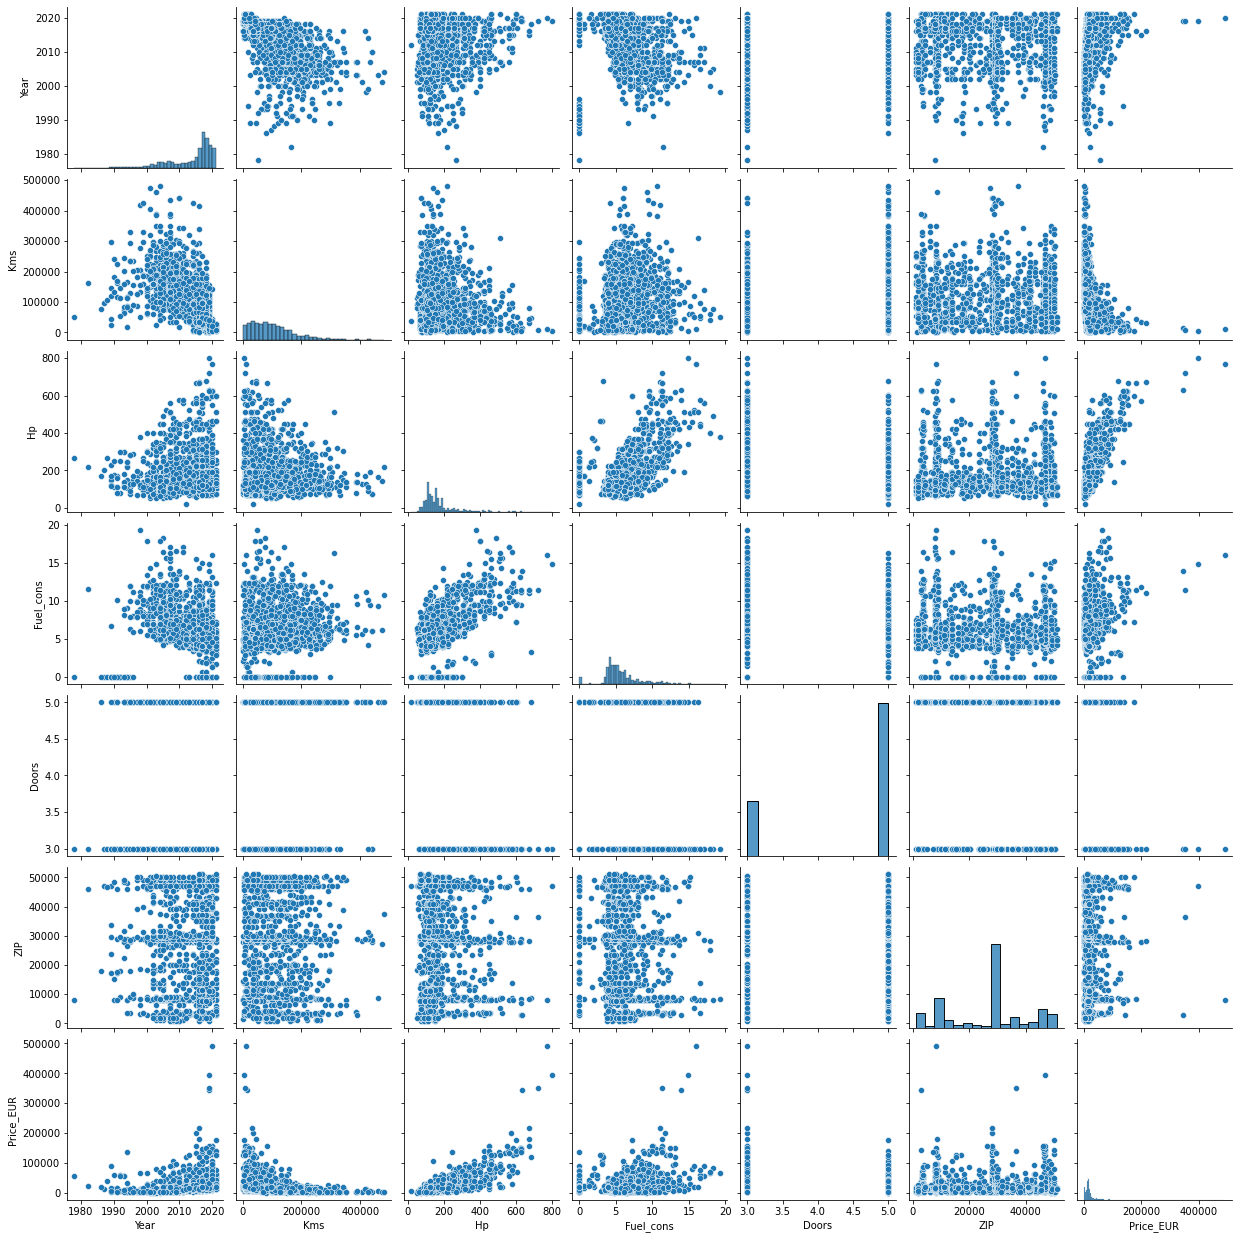

In [89]:
sns.pairplot(df)

In [90]:
corr = df.corr()
corr

,Year,Kms,Hp,Fuel_cons,Doors,ZIP,Price_EUR
Year,1.000000,-0.597412,-0.026060,-0.315378,0.250887,0.008189,0.235402
Kms,-0.597412,1.000000,-0.099432,0.180352,0.021458,0.036723,-0.343427
Hp,-0.026060,-0.099432,1.000000,0.622191,-0.454885,-0.009172,0.748794
Fuel_cons,-0.315378,0.180352,0.622191,1.000000,-0.354859,-0.052760,0.316000
Doors,0.250887,0.021458,-0.454885,-0.354859,1.000000,0.025699,-0.366445
ZIP,0.008189,0.036723,-0.009172,-0.052760,0.025699,1.000000,-0.010279
Price_EUR,0.235402,-0.343427,0.748794,0.316000,-0.366445,-0.010279,1.000000


In [91]:
corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_11036/3232203054.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


,Year,Kms,Hp,Fuel_cons,Doors,ZIP,Price_EUR
Year,1.00,-0.60,-0.03,-0.32,0.25,0.01,0.24
Kms,-0.60,1.00,-0.10,0.18,0.02,0.04,-0.34
Hp,-0.03,-0.10,1.00,0.62,-0.45,-0.01,0.75
Fuel_cons,-0.32,0.18,0.62,1.00,-0.35,-0.05,0.32
Doors,0.25,0.02,-0.45,-0.35,1.00,0.03,-0.37
ZIP,0.01,0.04,-0.01,-0.05,0.03,1.00,-0.01
Price_EUR,0.24,-0.34,0.75,0.32,-0.37,-0.01,1.00


## 4. MACHINE LEARNING

In [92]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [93]:
X = df[df.select_dtypes('number').columns[:-1]]
y = df[df.columns[-1]].astype(float)

In [94]:
X.shape, y.shape

((2335, 6), (2335,))

In [95]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .2)


In [96]:
lr = LinearRegression()

In [97]:
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
lr.coef_

array([ 6.10137690e+02, -5.73587621e-02,  2.12070410e+02, -1.36267045e+03,
       -2.78925557e+03,  7.08309468e-03])

Biggest coef look like YEAR and FUEL CONS. KMS variable that apparantley looked very significant could not have a big coef as it its highly correlated with YEAR

In [99]:
y_pred = lr.predict(X_test)

In [100]:
y_pred 

array([ 1.45999818e+04,  5.83296313e+03,  4.76450020e+03,  4.53522502e+04,
        8.55380642e+04,  4.98215067e+04,  2.56764187e+04,  5.83545916e+04,
        2.78926990e+03,  2.97604601e+03,  3.19579172e+04,  1.94234051e+04,
        1.06661220e+05,  4.20497850e+04,  3.88465040e+04,  1.92361691e+04,
        2.50240081e+04,  1.20333724e+03,  1.51035889e+04,  2.10290731e+04,
        1.68153594e+04,  4.32555858e+04,  3.40339007e+04,  1.98530676e+04,
        5.80424947e+04,  5.83348447e+04,  1.72764025e+04,  2.24649002e+04,
        1.20600638e+04,  6.50105860e+04, -5.67926436e+03,  2.06202090e+04,
        1.39470381e+04,  1.52557439e+04, -7.20126803e+03,  1.82768817e+04,
        1.49879907e+04,  3.08934090e+04,  2.71217489e+04,  1.86998048e+03,
        7.89495664e+03,  1.23353094e+04,  3.93715173e+03,  2.30422201e+04,
        8.33044279e+04,  2.45200815e+04,  7.47262869e+03,  2.26727426e+04,
        6.16986877e+04,  1.20146625e+04,  2.59706601e+03,  1.41705119e+04,
        1.04116630e+04,  

## Model Evaluation

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   2.,   1.,   1.,  23., 263., 132.,  30.,  12.]),
 array([-224892.55706609, -211558.00340741, -198223.44974873,
        -184888.89609005, -171554.34243137, -158219.7887727 ,
        -144885.23511402, -131550.68145534, -118216.12779666,
        -104881.57413799,  -91547.02047931,  -78212.46682063,
         -64877.91316195,  -51543.35950328,  -38208.8058446 ,
         -24874.25218592,  -11539.69852724,    1794.85513144,
          15129.40879011,   28463.96244879,   41798.51610747]),
 <BarContainer object of 20 artists>)

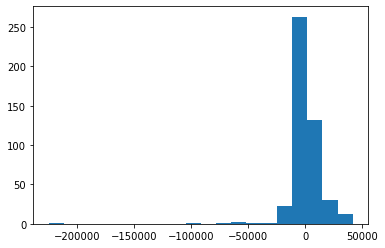

In [101]:
fig, ax = plt.subplots(1,1)
ax.hist(y_pred - y_test, bins = 20)

In [102]:
lr.score(X_test, y_test)

0.6561584637381587

In [103]:
from sklearn import metrics

In [104]:
#MAE
metrics.mean_absolute_error(y_test, y_pred)

7802.81761510926

In [105]:
#MAPE
metrics.mean_absolute_percentage_error(y_test, y_pred)

0.5554657988624764

In [106]:
#RMSE
metrics.mean_squared_error(y_test, y_pred, squared=False)

15930.67165812528